**EDA - TelCo Customer Churn**

using Python, Numpy, Pandas, Seaborn , Matplotlib

**Key Objectives:**

1. Data Cleaning & Preprocessing.
2. Exploratory Data Analysis (EDA):
  *   Univariate Analysis (Understanding Individual Features).
  *   Bivariate Analysis (Finding Relationships).
3. Feature Engineering.
4. Conclusion


**Problem Statement**

The goal of this project is to analyze customer churn patterns using exploratory data analysis (EDA). By understanding the factors effecting churn, businesses can take different steps to keep customers and increase their profit.

*Data Fetching and other basic settings*

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

In [ ]:
!pip install ydata-profiling --upgrade

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.1/392.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 60.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0506641e5be04db422a90f732d505449203e7e6bf2b35f4cc8dbdcc619c1cf91
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as profile


In [ ]:
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
profile.ProfileReport(df, title="Profile report of Telco Customers")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Understanding the Dataset**



*   Most categorical columns have only a few unique values, making them suitable for one-hot encoding. (for ML readiness)
*   customerID is unique for each customer, and should be used as a primary key for DB related queries..
* Tenure has Positive Skewness, meaning most customers are relatively new.
* TotalCharges correlates highly with Tenure. (longer tenure = higher charges) Also, Churn and Contract type have high correlation (month-to-month contracts have a higher churn rate).



**Data Pre-Processing**


*   TotalCharges was mistakenly stored as text; we convert it to numeric.
*   Converting categorical variables using one-hot encoding
*   Handling duplicate values (if any).
*   Ensuring all data types are correct for analysis and modeling.



In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# If duplicates exist, remove them
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")

Number of duplicate rows: 0


In [ ]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [ ]:
# One-hot encoding of 2 class categories
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
#Checking the skewness in tenure.

# Check skewness value
skewness = df["tenure"].skew()
print(f"Skewness of tenure: {skewness}")

df[df['tenure']== df['tenure'].max()]

Skewness of tenure: 0.2395397495619829


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
28,5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No
35,6234-RAAPL,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),99.90,7251.7,No
59,5954-BDFSG,Female,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.50,7853.7,No
62,0526-SXDJP,Male,0,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,No,Bank transfer (automatic),42.10,2962,No
94,9848-JQJTX,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),100.90,7459.05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982,8468-FZTOE,Female,0,Yes,Yes,72,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Electronic check,74.35,5237.4,No
7007,2274-XUATA,Male,1,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No
7022,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No


**Exploratory Data Analysis**

By transforming text-based or numerical data into visual formats like bar charts, histograms, and correlation plots, patterns, trends, and relationships that might otherwise go unnoticed can be easily identified and interpreted. This makes data visualization a powerful tool for analyzing and communicating insights effectively.

1.   Univariate Analysis (Understanding Each Variable): *This step helps us understand each feature separately, checking its distribution, outliers, and patterns.*

  *   Numerical Features (Histogram to see distributions & Boxplot to detect outliers.)
  *   Categorical Features (Bar Charts to see frequency distributions.)


2.   Bivariate Analysis (Finding Relationships): *It helps us find patterns between two variables and understand what affects churn.*

  *  Churn vs. Numerical Variables (Boxplots)
  *  Churn vs. Categorical Variables (Stacked Bar Charts)
  *  Correlation Heatmap (Finding Strong Relationships)






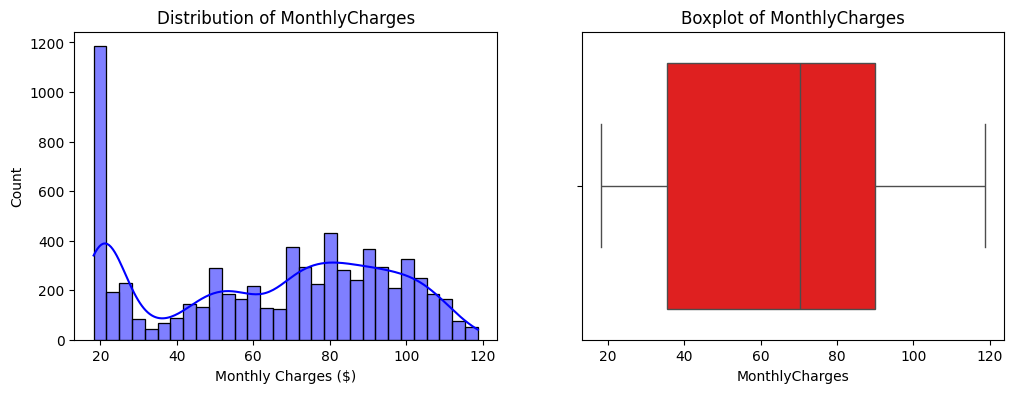

In [ ]:
# Numerical Features

plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df["MonthlyCharges"], bins=30, kde=True, color="blue")
plt.title("Distribution of MonthlyCharges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Count")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["MonthlyCharges"], color="red")
plt.title("Boxplot of MonthlyCharges")

plt.show()


* *Based on the Box-plot and the Histogram, the skewness is aprox. normal and there is no specific outlier detected.*

<ipython-input-11-a1857f47ba69>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="InternetService", data=df, palette="Set2")


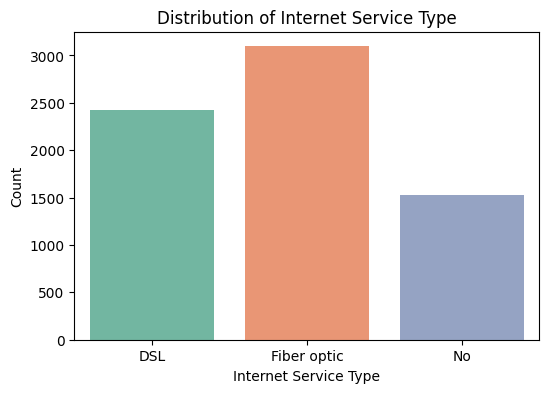

In [ ]:
# Categorical Features
# Internet Service category Barchart
plt.figure(figsize=(6, 4))
sns.countplot(x="InternetService", data=df, palette="Set2")
plt.title("Distribution of Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.show()


<ipython-input-12-76daff28308c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm")


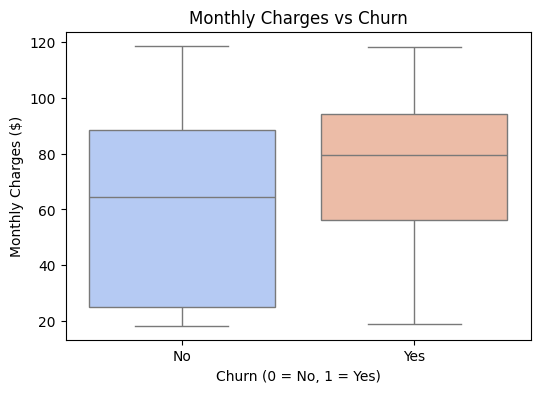

In [ ]:
# Churn vs. Numerical Variables Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm")
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges ($)")
plt.show()




*   *Churn=1 has higher MonthlyCharges, then high charges may lead to more customer loss.*



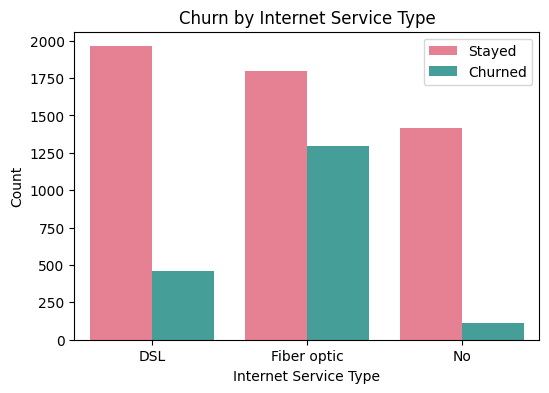

In [ ]:
# Churn vs. Categorical Variables

plt.figure(figsize=(6, 4))
sns.countplot(x="InternetService", hue="Churn", data=df, palette="husl")
plt.title("Churn by Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.legend(["Stayed", "Churned"])
plt.show()




*   *Fiber Optic customers have higher churn rates, they might be dissatisfied.*


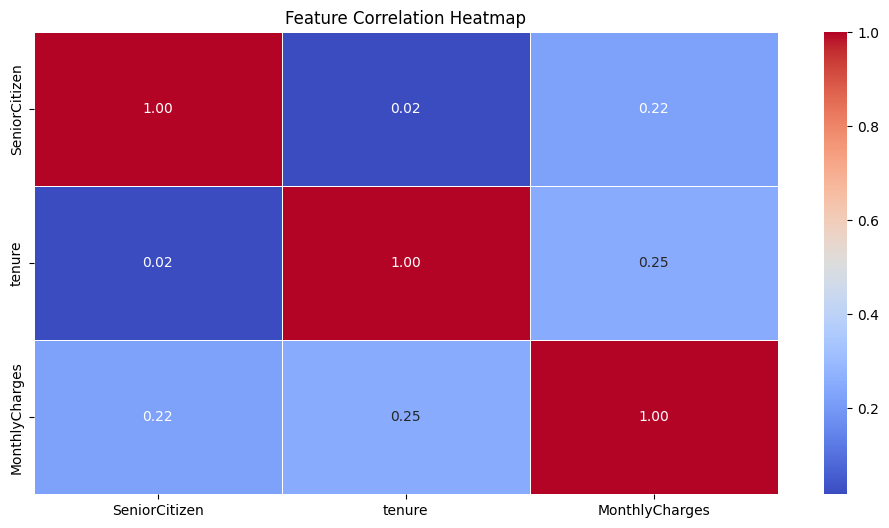

In [ ]:
# Selecting only numerical columns
df_numeric = df_encoded.select_dtypes(include=["number"])

# Compute correlation
plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()





*   *There is a relatively high correlation between MonthlyCharges and Tenure, meaning as the price of their plan increases, the chances are that they will stop extending their subscription.*
*   *the low correlation between tenure and SeniorCitizen means they usually tend to continue using the service.*



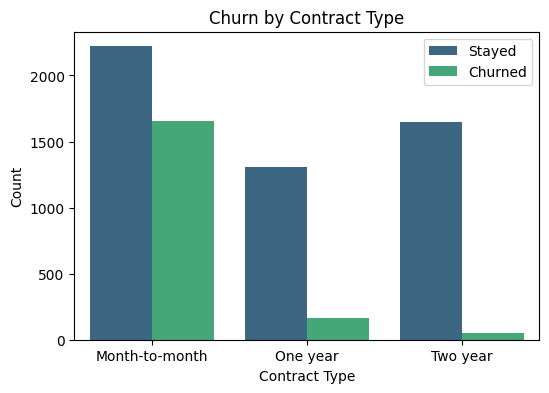

In [ ]:
# Relationships Between Churn vs. Contract Type

plt.figure(figsize=(6, 4))
sns.countplot(x="Contract", hue="Churn", data=df, palette="viridis")
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(["Stayed", "Churned"])
plt.show()




*   *This chart shows long-term plans increase customer retention.*
*   *Month-to-month contracts have higher churn, it means customers don’t want long-term commitments.*



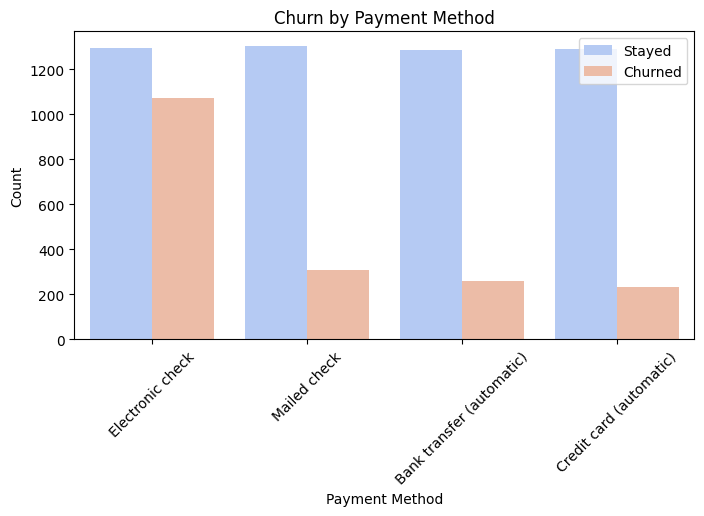

In [ ]:
#Churn vs. Payment Method

plt.figure(figsize=(8, 4))
sns.countplot(x="PaymentMethod", hue="Churn", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.legend(["Stayed", "Churned"])
plt.show()




*   *Electronic Check has the highest churn, it means these customers might find it inconvenient or expensive.*
*   *Credit Card & Bank Transfer have low churn, it suggests auto-pay reduces customer loss.*



In [ ]:
# Feature Engineering

# Feature 1: Creating a Tenure Category. This helps understand churn patterns based on customer loyalty.

def tenure_category(tenure):
    if tenure <= 12:
        return "0-1 year"
    elif tenure <= 24:
        return "1-2 years"
    elif tenure <= 48:
        return "2-4 years"
    else:
        return "4+ years"

df["TenureCategory"] = df["tenure"].apply(tenure_category)



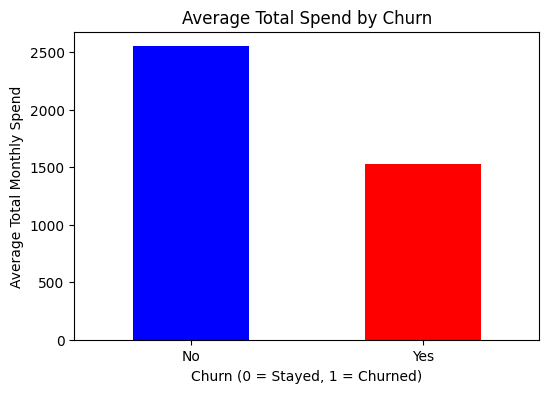

In [ ]:
#Feature 2: Creating a Total Monthly Spend Feature. This can help identify high-value customers who might need special attention.

df["TotalMonthlySpend"] = df["MonthlyCharges"] * df["tenure"]

plt.figure(figsize=(6,4))
df.groupby("Churn")["TotalMonthlySpend"].mean().plot(kind="bar", color=["blue", "red"])
plt.title("Average Total Spend by Churn")
plt.xlabel("Churn (0 = Stayed, 1 = Churned)")
plt.ylabel("Average Total Monthly Spend")
plt.xticks(rotation=0)
plt.show()





*   *Churned customers spend less, they might not see enough value in their service. Therefore, the companu should consider improving services for them.*



<ipython-input-29-dbda579b1e2b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AutoPay", y="Churn", data=df, palette="coolwarm")


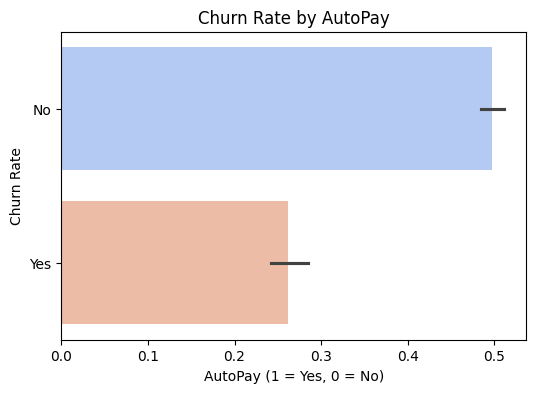

In [ ]:
#Feature 3: Creating an Auto-Pay Feature.
#Auto-Pay customers churn less, companies can promote auto-pay discounts.

def is_auto_pay(payment_method):
    if "Bank transfer" in payment_method or "Credit card" in payment_method:
        return 1
    else:
        return 0

df["AutoPay"] = df["PaymentMethod"].apply(is_auto_pay)

plt.figure(figsize=(6,4))
sns.barplot(x="AutoPay", y="Churn", data=df, palette="coolwarm")
plt.title("Churn Rate by AutoPay")
plt.xlabel("AutoPay (1 = Yes, 0 = No)")
plt.ylabel("Churn Rate")
plt.show()


*Ths shows that companies should promote AutoPay by offering discounts or cashback incentives.*

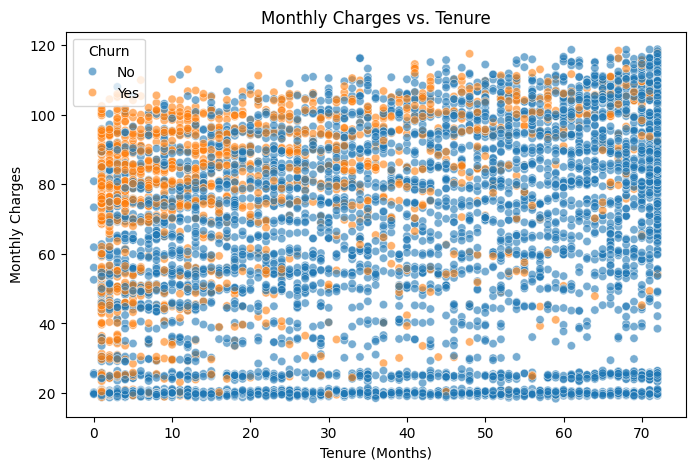

In [ ]:
#MonthlyCharges per Tenure
#Showcases whether loyal customers get better deals.

plt.figure(figsize=(8,5))
sns.scatterplot(x="tenure", y="MonthlyCharges", hue="Churn", data=df, alpha=0.6)
plt.title("Monthly Charges vs. Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges")
plt.show()



*new customers pay more and churn more, it suggests pricing for new users might be too high.*

**Conclusion & Recommendations**

*summary of findings and actionable business recommendations based on our analysis.*


*   High Monthly Charges Increase Churn Risk: Boxplot Analysis showed a higher churn rate in customers with premium plans. (*Actions: Offer **discounts** or **customized programs** to high-paying customers. Also, providing **Customer Support** can improve the result*)

*   New Customers Churn More Often: Customers who have been with the company for **less than a year** have the highest churn rate. It shows that **early-stage** churn is a major issue. (*Actions: Implement better starting programs to increase customer experience in the begining using special promotions or trials.*)

*   AutoPay Users Churn Less: This suggests **easy payment** methods improve retention. (*Actions: Provide reminders for manual payment users to switch to AutoPay.*)

*   Total Monthly Spend & Churn Relationship:  **High-spending** customers still **churn**, meaning price isn’t the only factor. It also happens in low-spending customers, meaning there is a lack of perceived value. (*Action: For high-spenders, offer options like premium customer service. / For low-spenders, advertise a more expensive service.*)

*   **Monthly** Contracts Have **Higher Churn**: Long-term contract customers have a lower churn rate. (*Actions: Give **discounts** for long-term contracts to customers. Also, make it easier for them by providing quick access upgrade option*)

